In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error

from tanzania import Colors, get_preprocessed_data, save_png

Colors.init_colors()

In [9]:
df = get_preprocessed_data('data/Train.csv')

In [10]:
X = df.copy()
y = X.pop('total_cost')

RNDSTATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=RNDSTATE)

In [11]:
X_train.shape

(3840, 154)

In [12]:
dummy_regressor = DummyRegressor(strategy = 'mean')

dummy_regressor.fit(X_train, y_train)

y_train_pred = dummy_regressor.predict(X_train)
y_pred = dummy_regressor.predict(X_test)


In [13]:
# train data

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5

# test data
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5

print(f'RMSE = {rmse_test.round(3)}, R2_score = {r2_test.round(5)}')

RMSE = 12186821.678, R2_score = -0.003


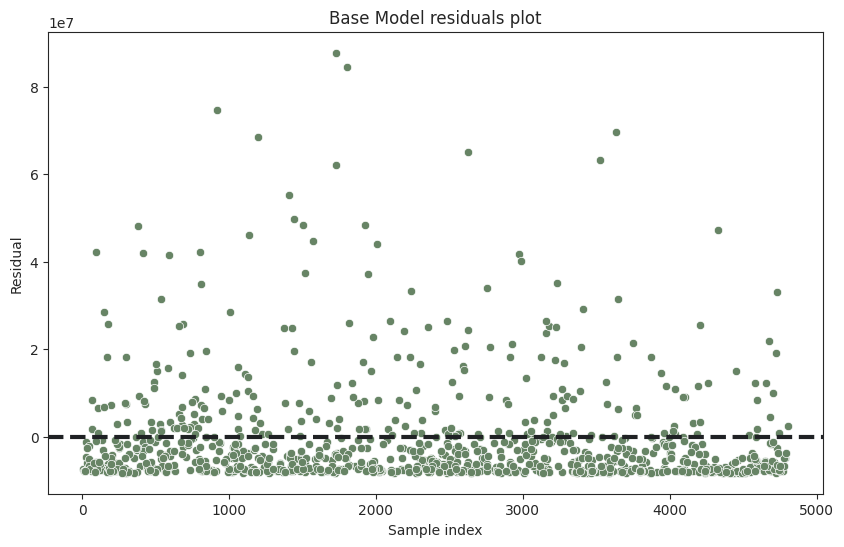

In [15]:
# make a graph
residuals = y_test - y_pred

plt.figure(figsize = (10, 6))
df_test = pd.DataFrame({
    'real': y_test,
    'predicted': y_pred,
    'residuals': residuals
})

sns.scatterplot(data = df_test, y = 'residuals', x = df_test.index, color = Colors.dark_matcha_green)
plt.axhline(0, color = Colors.accent_4, linestyle='--', linewidth = 3)
plt.xlabel('Sample index')
plt.ylabel('Residual')
plt.title('Base Model residuals plot')

save_png('pics/base_model_performance.png')
plt.show()
